#Advanced Topics

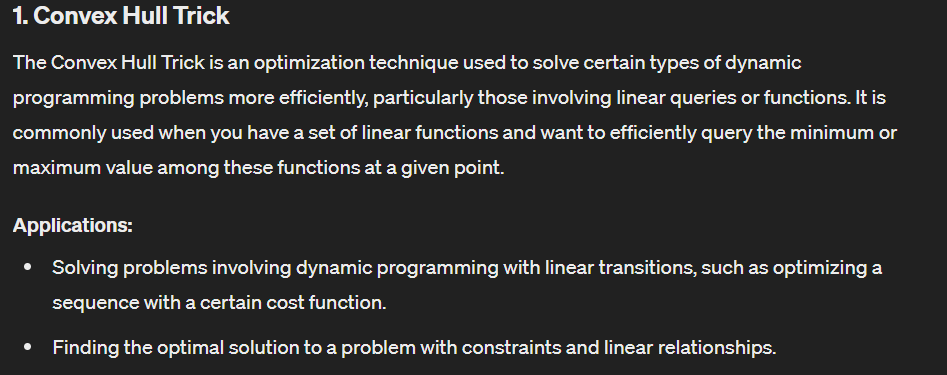

In [12]:
from collections import deque
import sys

class ConvexHullTrick:
    def __init__(self):
        self.lines = deque()  # Deque to maintain the lines

    def add_line(self, a, b):
        # Add a new line represented by coefficients (a, b)
        # Insert into the deque maintaining order
        while len(self.lines) >= 2 and self._bad(self.lines[-2], self.lines[-1], (a, b)):
            self.lines.pop()
        self.lines.append((a, b))

    def _bad(self, l1, l2, l3):
        # Utility function to check if line l2 is unnecessary between l1 and l3
        a1, b1 = l1
        a2, b2 = l2
        a3, b3 = l3
        # Intersection point x-coordinate
        x = (b3 - b1) / (a1 - a3)
        # Return true if l2 is not on the upper hull
        return x < (b2 - b1) / (a1 - a2)

    def query(self, x):
        # Query the minimum value at point x
        # Deque is assumed to be non-empty
        while len(self.lines) > 1 and self._eval(self.lines[0], x) >= self._eval(self.lines[1], x):
            self.lines.popleft()
        return self._eval(self.lines[0], x)

    def _eval(self, line, x):
        # Evaluate the line at point x
        a, b = line
        return a * x + b

# Example usage
if __name__ == "__main__":
    # Initialize Convex Hull Trick
    cht = ConvexHullTrick()

    # Example operations: add_line and query
    cht.add_line(1, 0)  # Add line y = x
    cht.add_line(-1, 5)  # Add line y = -x + 5

    # Query at x = 2
    result = cht.query(2)
    print("Minimum value at x = 2:", result)  # Expected output: 2

    # Add another line and query again
    cht.add_line(2, 3)  # Add line y = 2x + 3
    result = cht.query(2)
    print("Minimum value at x = 2 after adding y = 2x + 3:", result)  # Expected output: 7


Minimum value at x = 2: 2
Minimum value at x = 2 after adding y = 2x + 3: 2


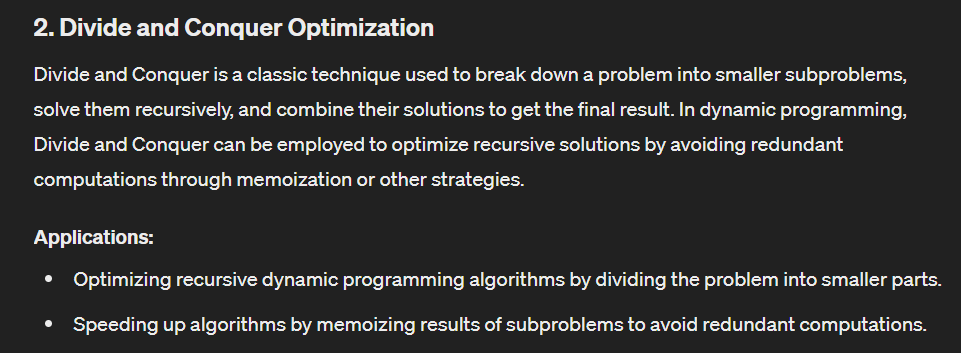

In [3]:
def divide_and_conquer_dp(nums, start, end, memo):
    if start >= end:
        return 0

    if (start, end) in memo:
        return memo[(start, end)]

    max_value = 0
    for i in range(start, end):
        # Recursive calls on subproblems
        left_sum = sum(nums[start:i+1])
        right_sum = divide_and_conquer_dp(nums, i+1, end, memo)
        max_value = max(max_value, left_sum + right_sum)

    memo[(start, end)] = max_value
    return max_value

# Example usage:
nums = [1, 2, 3, 4, 5]
memo = {}
result = divide_and_conquer_dp(nums, 0, len(nums), memo)
print(result)  # Output: 15

15


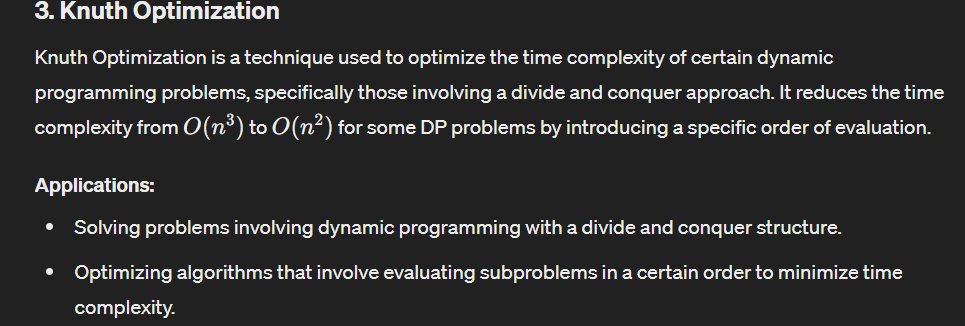

Source: https://www.geeksforgeeks.org/knuths-optimization-in-dynamic-programming/

In [6]:
def minCost(arr, N):
	# Creating the prefix sum array
	pref = [0] * (N + 1)
	dp = [[0 for i in range(N)] for j in range(N)]
	opt = [[0 for i in range(N)] for j in range(N)]

	# Loop to calculate the prefix sum
	for i in range(N):
		pref[i + 1] = pref[i] + arr[i]
		opt[i][i] = i

	# Iterating through all sub-arrays
	# of length 2 or greater
	for i in range(N - 2, -1, -1):
		for j in range(i + 1, N):
			# Cost function = sum of
			# all elements in the sub-array
			cost = pref[j + 1] - pref[i]
			mn = float("inf")
			for k in range(opt[i][j - 1], min(j - 1, opt[i + 1][j]) + 1):
				if mn >= dp[i][k] + dp[k + 1][j] + cost:
					# Updating opt table
					opt[i][j] = k
					# Updating minimum cost
					mn = dp[i][k] + dp[k + 1][j] + cost
			# dp transition
			dp[i][j] = mn
	return dp[0][N - 1]

# Driver code
if __name__ == '__main__':
	arr = [3, 4, 2, 1, 7]
	N = len(arr)

	# Function call
	print(minCost(arr, N))

37


#Treaps (Cartesian Trees)

In [13]:
import random

class TreapNode:
    def __init__(self, key, priority):
        self.key = key
        self.priority = priority
        self.left = None
        self.right = None

class Treap:
    def __init__(self):
        self.root = None

    def _rotate_right(self, node):
        # Right rotation of the given node
        new_root = node.left
        node.left = new_root.right
        new_root.right = node
        return new_root

    def _rotate_left(self, node):
        # Left rotation of the given node
        new_root = node.right
        node.right = new_root.left
        new_root.left = node
        return new_root

    def insert(self, key, priority):
        # Insert a node with given key and priority into the treap
        self.root = self._insert(self.root, key, priority)

    def _insert(self, node, key, priority):
        # Helper function to recursively insert a node into the treap
        if not node:
            return TreapNode(key, priority)

        if key < node.key:
            node.left = self._insert(node.left, key, priority)
            # Perform right rotation if necessary to maintain heap property
            if node.left.priority > node.priority:
                node = self._rotate_right(node)
        else:
            node.right = self._insert(node.right, key, priority)
            # Perform left rotation if necessary to maintain heap property
            if node.right.priority > node.priority:
                node = self._rotate_left(node)

        return node

    def delete(self, key):
        # Delete a node with the given key from the treap
        self.root = self._delete(self.root, key)

    def _delete(self, node, key):
        # Helper function to recursively delete a node from the treap
        if not node:
            return None

        if key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            # Found the node to delete
            if not node.left:
                return node.right
            elif not node.right:
                return node.left
            else:
                if node.left.priority > node.right.priority:
                    node = self._rotate_right(node)
                    node.right = self._delete(node.right, key)
                else:
                    node = self._rotate_left(node)
                    node.left = self._delete(node.left, key)

        return node

    def search(self, key):
        # Search for a node with the given key in the treap
        return self._search(self.root, key)

    def _search(self, node, key):
        # Helper function to recursively search for a node with the given key
        if not node:
            return None

        if key == node.key:
            return node
        elif key < node.key:
            return self._search(node.left, key)
        else:
            return self._search(node.right, key)

    def inorder_traversal(self):
        # Perform inorder traversal of the treap
        result = []
        self._inorder(self.root, result)
        return result

    def _inorder(self, node, result):
        # Helper function for inorder traversal
        if not node:
            return
        self._inorder(node.left, result)
        result.append((node.key, node.priority))
        self._inorder(node.right, result)

# Example usage:
if __name__ == "__main__":
    # Create a Treap instance
    treap = Treap()

    # Insert nodes with random keys and priorities
    keys = [10, 5, 15, 7, 12, 3]
    for key in keys:
        priority = random.randint(1, 100)
        treap.insert(key, priority)

    # Perform inorder traversal to display the treap
    print("Inorder traversal of the treap:")
    print(treap.inorder_traversal())

    # Search for a node
    search_key = 12
    result = treap.search(search_key)
    if result:
        print(f"Node with key {search_key} found with priority {result.priority}")
    else:
        print(f"Node with key {search_key} not found")

    # Delete a node
    delete_key = 7
    treap.delete(delete_key)
    print(f"Deleted node with key {delete_key}")

    # Perform inorder traversal after deletion
    print("Inorder traversal after deletion:")
    print(treap.inorder_traversal())

Inorder traversal of the treap:
[(3, 25), (5, 85), (7, 41), (10, 95), (12, 81), (15, 27)]
Node with key 12 found with priority 81
Deleted node with key 7
Inorder traversal after deletion:
[(3, 25), (5, 85), (10, 95), (12, 81), (15, 27)]


#Min-Queue Implementation


In [14]:
from collections import deque

class MinQueue:
    def __init__(self):
        self.queue = deque()
        self.min_queue = deque()  # Auxiliary deque to track minimum elements

    def enqueue(self, value):
        self.queue.append(value)
        # Maintain the minimum queue
        while self.min_queue and self.min_queue[-1] > value:
            self.min_queue.pop()
        self.min_queue.append(value)

    def dequeue(self):
        if not self.queue:
            return None
        value = self.queue.popleft()
        # Update the minimum queue if necessary
        if value == self.min_queue[0]:
            self.min_queue.popleft()
        return value

    def get_min(self):
        if not self.min_queue:
            return None
        return self.min_queue[0]

# Example usage:
if __name__ == "__main__":
    min_queue = MinQueue()

    min_queue.enqueue(3)
    min_queue.enqueue(1)
    min_queue.enqueue(4)

    print("Current min in queue:", min_queue.get_min())  # Output: 1

    min_queue.dequeue()

    print("Updated min in queue:", min_queue.get_min())  # Output: 1

Current min in queue: 1
Updated min in queue: 1


#Min-Stack Implementation


In [15]:
class MinStack:
    def __init__(self):
        self.stack = []
        self.min_stack = []

    def push(self, value):
        self.stack.append(value)
        if not self.min_stack or value <= self.min_stack[-1]:
            self.min_stack.append(value)

    def pop(self):
        if not self.stack:
            return None
        value = self.stack.pop()
        if value == self.min_stack[-1]:
            self.min_stack.pop()
        return value

    def top(self):
        if not self.stack:
            return None
        return self.stack[-1]

    def get_min(self):
        if not self.min_stack:
            return None
        return self.min_stack[-1]

# Example usage:
if __name__ == "__main__":
    min_stack = MinStack()

    min_stack.push(3)
    min_stack.push(1)
    min_stack.push(4)

    print("Current min in stack:", min_stack.get_min())  # Output: 1

    min_stack.pop()

    print("Updated min in stack:", min_stack.get_min())  # Output: 1

Current min in stack: 1
Updated min in stack: 1
